# Identifying the Authors of Classic English Fiction Books

Given an exerpt from an English text, we hope to create a classifcation model that will be able to identify the probability that the work was writtne by a particular author. Our model will use stylometric features (quantifiable features that capture some element of a work's style) to classify and assign works to differnt authors. The candidate authors are Charles Dickens, Jane Austen, Mark Twain, etc.

Given a text in English, we wish to perform a classification in predicting what author among several possible candidates wrote it. The writing styles of any two authors generally differs, and we hope to build a model that recognizes this difference in a consistent way. 
...label chunks of texts to one out of several possible candidate authors. The candidate authors are Charles Dickens, Jane Austen, Mark Twain (add more).


# Imports 

The next cell contains libraries that need to be installed before modeling.

In [1]:
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import tree

# Classification

We used One Vs One and One Vs Rest classifiers for Logistic Regression (LR) and Support Vector Machine (SVM). 

One Vs Rest classifier constructs one classifier per class. This method is known to be computational efficiency since only n classes classifiers are needed and is advantageous for gaining knowledge about one class by inspecting its corresponding classifier. 

One Vs One classifier constructs one classifier per pair of classes. This method is known to be advantageous for algorithms such as SVM which don’t scale well with more samples because each individual learning problem within pair of classes only involve a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used multiple times.

We created different feature processed csv's with 1 grams, 2 grams, and 3 grams for two authors: Mildred A. Wirt and Oscar Wilde. 

In [2]:
author2grams1 = pd.read_csv("2author1grams.csv",header = 0, index_col = 0)
author2grams2 = pd.read_csv("2author2grams.csv",header = 0, index_col = 0)
author2grams3 = pd.read_csv("2author3grams.csv",header = 0, index_col = 0)
author2 = [author2grams1, author2grams2, author2grams3]

We constructed 10 folds cross validations for One VS One and One VS Rest Classification Logistic Regression and One Vs One and One Vs Rest Classification Support Vector Machine.

In [3]:
kfold_LR_OVR = []
kfold_LR_OVO = []
kfold_SVM_OVR = []
kfold_SVM_OVO = []

for gram in author2:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())

    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVO.append(results.mean())

    modelCV = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVO.append(results.mean())

author2 = pd.DataFrame({"kfold_LR_OVR": kfold_LR_OVR, "kfold_LR_OVO":kfold_LR_OVO,"kfold_SVM_OVR": kfold_SVM_OVR, "kfold_SVM_OVO":kfold_SVM_OVO },index = [1,2,3])

In [4]:
author2

,kfold_LR_OVO,kfold_LR_OVR,kfold_SVM_OVO,kfold_SVM_OVR
1,0.91,0.91,0.93,0.93
2,0.89,0.89,0.89,0.89
3,0.92,0.92,0.92,0.92


Text(0.5,0,'Number of Grams')

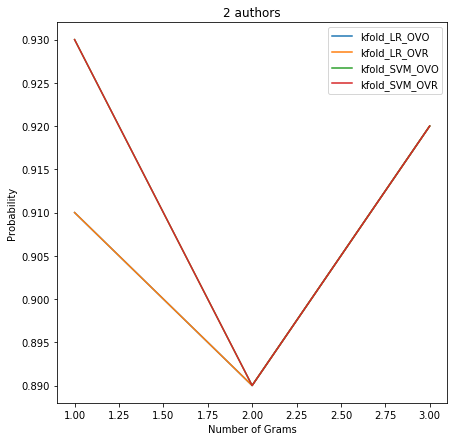

In [5]:
ax =author2.plot.line(figsize=(7,7), title='2 authors')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Grams")

Because the models were only testing on two authors, One Vs One and One Vs Rest Classification restuls did not differ. One grams performed with the highest accuracy and SVM did slightly better than LR.

Next we modeled 1 grams, 2 grams, and 3 grams for three authors: Mildred A. Wirt, Oscar Wilde, Mark Twain. 

In [6]:
kfold_LR_OVR = []
kfold_LR_OVO = []
kfold_SVM_OVR = []
kfold_SVM_OVO = []

author3grams1 = pd.read_csv("3author1grams.csv",header = 0, index_col = 0)
author3grams2 = pd.read_csv("3author2grams.csv",header = 0, index_col = 0)
author3grams3 = pd.read_csv("3author3grams.csv",header = 0, index_col = 0)
author3 = [author3grams1, author3grams2, author3grams3]

for gram in author3:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())

    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVO.append(results.mean())

    modelCV = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVO.append(results.mean())

author3 = pd.DataFrame({"kfold_LR_OVR": kfold_LR_OVR, "kfold_LR_OVO":kfold_LR_OVO,"kfold_SVM_OVR": kfold_SVM_OVR, "kfold_SVM_OVO":kfold_SVM_OVO },index = [1,2,3])

In [7]:
author3

,kfold_LR_OVO,kfold_LR_OVR,kfold_SVM_OVO,kfold_SVM_OVR
1,0.685714,0.642857,0.621429,0.601786
2,0.551786,0.562500,0.619643,0.641071
3,0.551786,0.562500,0.619643,0.641071


Text(0.5,0,'Number of Grams')

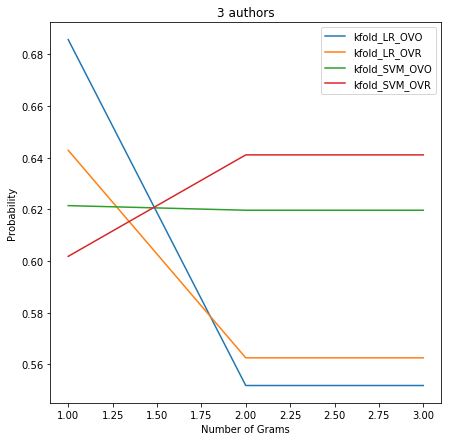

In [8]:
ax =author3.plot.line(figsize=(7,7), title='3 authors')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Grams")

The results from three authors are very different from the reuslts from two authors. There is a large decrease in accuracy from ~90% to ~68%. One grams for LR_OVO, LR_OVR and SVM_OVO did better than its 2 and 3 grams counterparts. While SVM_OVR did better with more grams. 

Next we modeled 1 grams and 2 grams for four authors: Mildred A. Wirt, Oscar Wilde, Mark Twain and Elizabeth Gaskell. We were unable to retrieve data for 3 grams because of the long duration (2.5 hours) to collect data from 3 authors. 

In [9]:
kfold_LR_OVR = []
kfold_LR_OVO = []
kfold_SVM_OVR = []
kfold_SVM_OVO = []

author4grams1 = pd.read_csv("4author1grams.csv",header = 0, index_col = 0)
author4grams2 = pd.read_csv("4author2grams.csv",header = 0, index_col = 0)
author4 = [author4grams1, author4grams2]

for gram in author4:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())

    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVO.append(results.mean())

    modelCV = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVO.append(results.mean())

author4 = pd.DataFrame({"kfold_LR_OVR": kfold_LR_OVR, "kfold_LR_OVO":kfold_LR_OVO,"kfold_SVM_OVR": kfold_SVM_OVR, "kfold_SVM_OVO":kfold_SVM_OVO },index = [1,2])

In [10]:
author4

,kfold_LR_OVO,kfold_LR_OVR,kfold_SVM_OVO,kfold_SVM_OVR
1,0.536667,0.431111,0.622222,0.462222
2,0.526667,0.387778,0.588889,0.503333


Text(0.5,0,'Number of Grams')

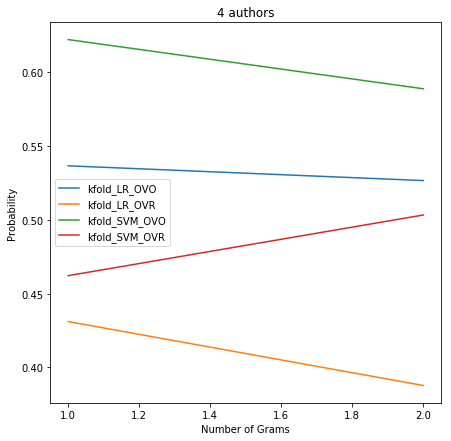

In [11]:
ax =author4.plot.line(figsize=(7,7), title='4 authors')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Grams")

SVM_OVO is finally doing better than other Logistic Regression models. 

Next we wanted to see how many grams we wanted to extract from books from these authors. 

In [12]:
LR_OVO_df = pd.DataFrame()
LR_OVO_df=LR_OVO_df.append(author2['kfold_LR_OVO'])
LR_OVO_df=LR_OVO_df.append(author3['kfold_LR_OVO'])
LR_OVO_df=LR_OVO_df.append(author4['kfold_LR_OVO'])
new_index = [2, 3, 4]
new_columns = ["1 gram","2 gram","3 gram"]
LR_OVO_df.index = new_index
LR_OVO_df.columns = new_columns
LR_OVO_df

,1 gram,2 gram,3 gram
2,0.910000,0.890000,0.920000
3,0.685714,0.551786,0.551786
4,0.536667,0.526667,NaN


Text(0.5,0,'Number of Authors')

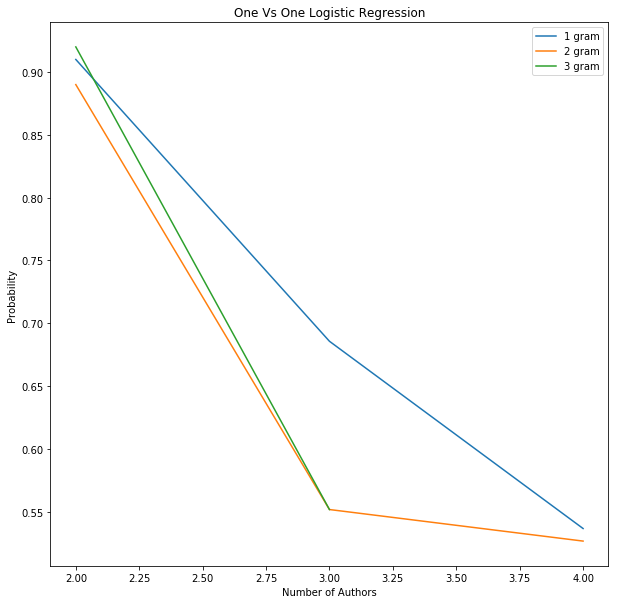

In [13]:
ax = LR_OVO_df.plot(kind = 'line',figsize=(10,10), title='One Vs One Logistic Regression')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In [14]:
LR_OVR_df = pd.DataFrame()
LR_OVR_df=LR_OVR_df.append(author2['kfold_LR_OVR'])
LR_OVR_df=LR_OVR_df.append(author3['kfold_LR_OVR'])
LR_OVR_df=LR_OVR_df.append(author4['kfold_LR_OVR'])
LR_OVR_df.index = new_index
LR_OVR_df.columns = new_columns
LR_OVR_df

,1 gram,2 gram,3 gram
2,0.910000,0.890000,0.9200
3,0.642857,0.562500,0.5625
4,0.431111,0.387778,NaN


Text(0.5,0,'Number of Authors')

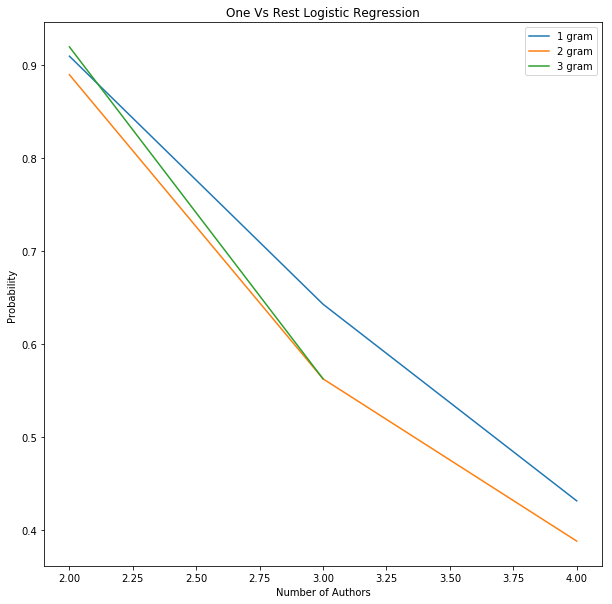

In [15]:
ax = LR_OVR_df.plot(kind = 'line',figsize=(10,10), title='One Vs Rest Logistic Regression')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In [16]:
SVM_OVO_df = pd.DataFrame()
SVM_OVO_df=SVM_OVO_df.append(author2['kfold_SVM_OVO'])
SVM_OVO_df=SVM_OVO_df.append(author3['kfold_SVM_OVO'])
SVM_OVO_df=SVM_OVO_df.append(author4['kfold_SVM_OVO'])
SVM_OVO_df.index = new_index
SVM_OVO_df.columns = new_columns
SVM_OVO_df

,1 gram,2 gram,3 gram
2,0.930000,0.890000,0.920000
3,0.621429,0.619643,0.619643
4,0.622222,0.588889,NaN


Text(0.5,0,'Number of Authors')

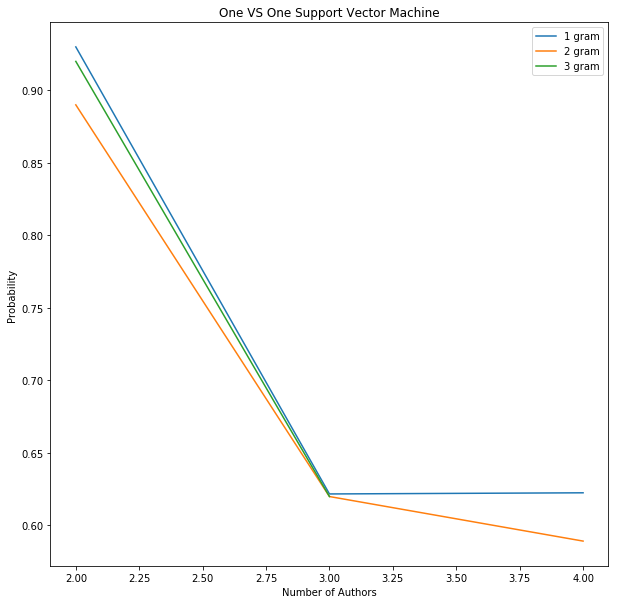

In [17]:
ax = SVM_OVO_df.plot(kind = 'line',figsize=(10,10), title='One VS One Support Vector Machine')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In [18]:
SVM_OVR_df = pd.DataFrame()
SVM_OVR_df=SVM_OVR_df.append(author2['kfold_SVM_OVR'])
SVM_OVR_df=SVM_OVR_df.append(author3['kfold_SVM_OVR'])
SVM_OVR_df=SVM_OVR_df.append(author4['kfold_SVM_OVR'])
SVM_OVR_df.index = new_index
SVM_OVR_df.columns = new_columns
SVM_OVR_df

,1 gram,2 gram,3 gram
2,0.930000,0.890000,0.920000
3,0.601786,0.641071,0.641071
4,0.462222,0.503333,NaN


Text(0.5,0,'Number of Authors')

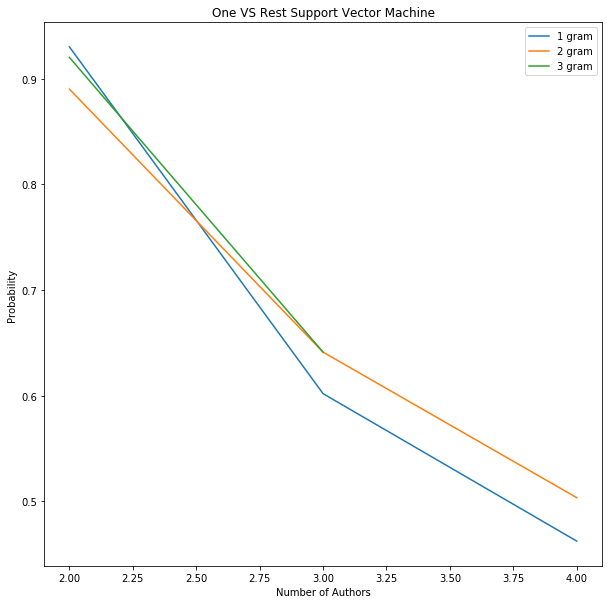

In [19]:
ax = SVM_OVR_df.plot(kind = 'line',figsize=(10,10), title='One VS Rest Support Vector Machine')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In all the figures except One Vs Rest SVM, the 1 grams line did better than the 2 or 3 grams line. However with One Vs Rest classification SVM, 1 grams did the worst with 3 and 4 authors. This shows that One Vs Rest SVM scales better with more information.

We decieded to extract 1 grams from authors due to the lengthy time it takes to extract 2 or 3 grams. 
We have up to 10 authors: Mildred A. Wirt, Oscar Wilde, Mark Twain and Elizabeth Gaskell, George Eliot, Thomas Hardy, Robert Louis Stevenson, Arthur Conan Doyle, Edgar Rice Burroughs, Jack London. 

In [20]:
author2grams1 = pd.read_csv("2author1grams.csv",header = 0, index_col = 0)
author3grams1 = pd.read_csv("3author1grams.csv",header = 0, index_col = 0)
author4grams1 = pd.read_csv("4author1grams.csv",header = 0, index_col = 0)
author5grams1 = pd.read_csv("5author1grams.csv",header = 0, index_col = 0)
author6grams1 = pd.read_csv("6author1grams.csv",header = 0, index_col = 0)
author7grams1 = pd.read_csv("7author1grams.csv",header = 0, index_col = 0)
author8grams1 = pd.read_csv("8author1grams.csv",header = 0, index_col = 0)
author9grams1 = pd.read_csv("9author1grams.csv",header = 0, index_col = 0)
author10grams1 = pd.read_csv("10author1grams.csv",header = 0, index_col = 0)

grams = [author2grams1,author3grams1,author4grams1,author5grams1,author6grams1,author7grams1,author8grams1,author9grams1,author10grams1]

In [21]:
kfold_LR_OVR = []
kfold_LR_OVO = []
kfold_SVM_OVR = []
kfold_SVM_OVO = []

for gram in grams:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())

    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_LR_OVO.append(results.mean())

    modelCV = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(svm.SVC(kernel='linear', C=1))
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM_OVO.append(results.mean())

gram1 = pd.DataFrame({"kfold_LR_OVR": kfold_LR_OVR, "kfold_LR_OVO":kfold_LR_OVO,"kfold_SVM_OVR": kfold_SVM_OVR, "kfold_SVM_OVO":kfold_SVM_OVO },index = [2,3,4,5,6,7,8,9,10])


In [22]:
gram1

,kfold_LR_OVO,kfold_LR_OVR,kfold_SVM_OVO,kfold_SVM_OVR
2,0.910000,0.910000,0.930000,0.930000
3,0.685714,0.642857,0.621429,0.601786
4,0.536667,0.431111,0.622222,0.462222
5,0.382576,0.345455,0.464394,0.390909
6,0.259890,0.221429,0.310989,0.358791
7,0.291830,0.286601,0.342810,0.426471
8,0.193676,0.141107,0.202767,0.244862
9,0.139231,0.103385,0.155538,0.274154
10,0.079785,0.020000,0.086237,0.371398


Text(0.5,0,'Number of Authors')

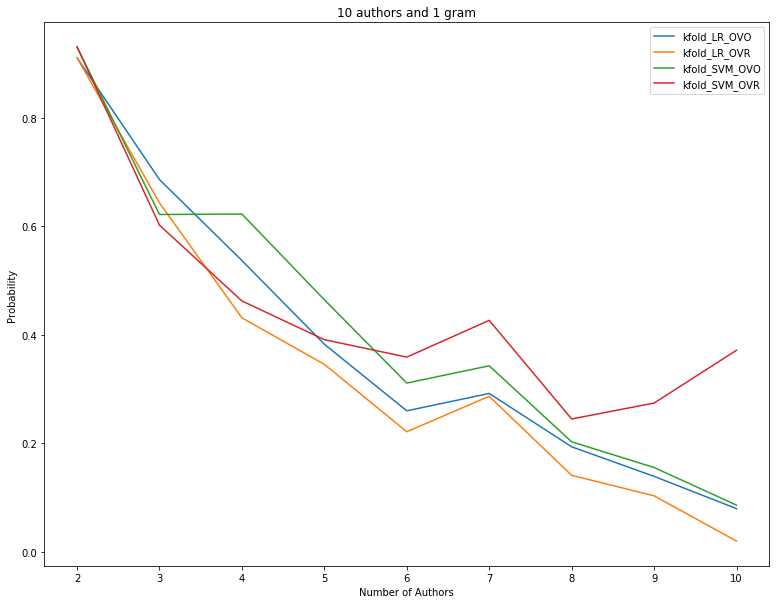

In [23]:
ax =gram1.plot.line(figsize=(13,10), title='10 authors and 1 gram')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

There are trends of decreases in accuracy in all models. However, SVM's have higher accuracys than LR and One Vs One SVM has lower accuracy results than One Vs Rest SVM due to only viewing one small subset of data. 